 # Analysis of UN General Debate speeches
    
For this analysis we look into the plain text version of UN General Debate speeches from 1970 up to 2018.

Specify below the period of year in this analysis. It will be consider as the end point of historical analyses, as well as the year for annual analyses.

## Import and Explore the dataset

In [1]:
import preprocess
from mydictionary import *
import pandas as pd
import climateKeywords
p = preprocess.preprocess()
p.readFile('..\\data\\Converted sessions')#Converted sessions
#print(p.countries)
countries = p.countries
countries_years = p.countries_years
regions = {}
for country in countries.keys():
    region = p.get_who_region(country)
    regions[region] = regions.get(region,0) + countries[country]

regions_years = {}
for region in who_regions.keys():
    regions_years[region] = {}
for country in countries_years.keys():
    region = p.get_who_region(country)
    if region:
        for year in countries_years[country].keys():
            regions_years[region][year] = regions_years[region].get(year, 0) + countries_years[country][year]

read as csv file

In [12]:
from preprocess import FileCsvExport

myFiles = '..\\data\\Converted sessions'
outputFile = '..\\data\\output.csv'

exporter = FileCsvExport(directory = myFiles, output = outputFile, header = ['File Name', 'Content'], file_mask = '.txt')
if exporter.export():
    print(f"Export complete. Total rows: {exporter.rows}.")

Export complete. Total rows: 8093.


<b> Number of speeches per country/ per year</b>

In [3]:
df_countries = pd.DataFrame(sorted(countries.items(), key=lambda k: k[1], reverse=False), columns=["Country", "Number of speeches"])
df_countries

,Country,Number of speeches
0,EU,8
1,South Sudan,8
2,Montenegro,13
3,Serbia,13
4,Holy See (Vatican City State),16
...,...,...
195,Turkey,49
196,Ukraine,49
197,Uruguay,49
198,United States,49


In [4]:
years = p.years
df_years = pd.DataFrame(sorted(years.items(), reverse=True), columns=["Year", "Number of speeches"])
df_years

,Year,Number of speeches
0,2018,196
1,2017,196
2,2016,194
3,2015,193
4,2014,194
5,2013,193
6,2012,195
7,2011,194
8,2010,189
9,2009,193


In [5]:
# number of speeches for each region
df_regions = pd.DataFrame(sorted(regions.items(), key=lambda k: k[1], reverse=True), columns=["Region", "Number of speeches"])
print("------# number of speeches for each region-----------")
print(df_regions)
print('---------------------')

------# number of speeches for each region-----------
                            Region  Number of speeches
0                           Europe                2110
1                           Africa                2009
2  Latin America and the Caribbean                1481
3            Eastern Mediterranean                1009
4                  Western Pacific                 921
5                  South-East Asia                 465
6                    North America                  98
---------------------


In [6]:
focus_year = "1970-2018"
ck = climateKeywords.climateKeywords()
ck.getResults(p.docs, p.files, p.countries, p.years, p.countries_years, focus_year,regions_years)

Loading ..\data\Converted sessions\Session 25 - 1970\ALB_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\ARG_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\AUS_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\AUT_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\BEL_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\BLR_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\BOL_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\BRA_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\CAN_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\CMR_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\COG_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\COL_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\CRI_25_1970.txt
Loading ..\data\Converted sessions\Session 25 - 1970\CUB_25_1970.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 26 - 1971\SOM_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\SWE_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\SYR_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TCD_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TGO_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\THA_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TTO_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TUN_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TUR_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\TZA_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\UGA_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\UKR_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\URY_26_1971.txt
Loading ..\data\Converted sessions\Session 26 - 1971\USA_26_1971.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 28 - 1973\COD_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\COG_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\COL_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\CRI_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\CSK_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\CUB_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\CYP_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\DDR_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\DEU_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\DNK_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\DZA_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\ECU_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\EGY_28_1973.txt
Loading ..\data\Converted sessions\Session 28 - 1973\ESP_28_1973.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 29 - 1974\IRN_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\IRQ_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\ISL_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\ISR_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\ITA_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\JAM_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\JOR_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\JPN_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\KEN_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\KHM_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\KWT_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\LAO_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\LBN_29_1974.txt
Loading ..\data\Converted sessions\Session 29 - 1974\LBR_29_1974.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 30 - 1975\RUS_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\RWA_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SAU_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SDN_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SEN_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SGP_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SLE_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SLV_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SOM_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SWE_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\SYR_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\TCD_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\TGO_30_1975.txt
Loading ..\data\Converted sessions\Session 30 - 1975\THA_30_1975.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 32 - 1977\AFG_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\AGO_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\ALB_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\ARE_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\ARG_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\AUS_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\AUT_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BDI_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BEL_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BEN_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BFA_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BGD_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BGR_32_1977.txt
Loading ..\data\Converted sessions\Session 32 - 1977\BHR_32_1977.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 33 - 1978\BRB_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\BTN_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\BWA_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CAF_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CAN_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CHL_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CHN_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CIV_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CMR_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\COD_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\COG_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\COL_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\COM_33_1978.txt
Loading ..\data\Converted sessions\Session 33 - 1978\CPV_33_1978.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 34 - 1979\DDR_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\DEU_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\DJI_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\DMA_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\DOM_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\DZA_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\ECU_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\EGY_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\ESP_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\ETH_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\FIN_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\FJI_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\FRA_34_1979.txt
Loading ..\data\Converted sessions\Session 34 - 1979\GAB_34_1979.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 35 - 1980\GIN_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GMB_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GNB_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GNQ_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GRC_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GRD_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GTM_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\GUY_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\HND_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\HTI_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\HUN_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\IDN_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\IND_35_1980.txt
Loading ..\data\Converted sessions\Session 35 - 1980\IRL_35_1980.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 36 - 1981\ISL_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\ISR_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\ITA_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\JAM_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\JOR_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\JPN_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\KEN_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\KHM_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\KWT_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\LAO_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\LBN_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\LBR_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\LBY_36_1981.txt
Loading ..\data\Converted sessions\Session 36 - 1981\LCA_36_1981.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 37 - 1982\MNG_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\MOZ_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\MRT_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\MUS_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\MYS_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NER_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NGA_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NIC_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NLD_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NOR_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NPL_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\NZL_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\OMN_37_1982.txt
Loading ..\data\Converted sessions\Session 37 - 1982\PAK_37_1982.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 38 - 1983\POL_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\PRT_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\PRY_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\QAT_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\ROU_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\RUS_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\RWA_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SAU_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SDN_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SEN_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SGP_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SLB_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SLE_38_1983.txt
Loading ..\data\Converted sessions\Session 38 - 1983\SLV_38_1983.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 39 - 1984\SGP_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SLB_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SLE_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SLV_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SOM_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\STP_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SUR_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SWE_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SWZ_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\SYR_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\TCD_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\TGO_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\THA_39_1984.txt
Loading ..\data\Converted sessions\Session 39 - 1984\TTO_39_1984.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 41 - 1986\ALB_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\ARE_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\ARG_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\ATG_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\AUS_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\AUT_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BDI_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BEL_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BFA_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BGD_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BGR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BHR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BHS_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\BLR_41_1986.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 41 - 1986\SUR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\SWE_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\SWZ_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\SYR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TCD_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TGO_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\THA_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TTO_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TUN_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TUR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\TZA_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\UKR_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\URY_41_1986.txt
Loading ..\data\Converted sessions\Session 41 - 1986\USA_41_1986.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 42 - 1987\NIC_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\NLD_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\NOR_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\NPL_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\NZL_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\OMN_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PAK_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PAN_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PER_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PHL_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PNG_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\POL_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PRT_42_1987.txt
Loading ..\data\Converted sessions\Session 42 - 1987\PRY_42_1987.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 43 - 1988\JOR_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\JPN_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\KEN_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\KHM_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\KNA_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\KWT_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LAO_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LBN_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LBR_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LBY_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LCA_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LKA_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LSO_43_1988.txt
Loading ..\data\Converted sessions\Session 43 - 1988\LUX_43_1988.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 44 - 1989\DOM_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\DZA_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\ECU_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\EGY_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\ESP_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\ETH_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\FIN_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\FJI_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\FRA_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\GAB_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\GBR_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\GHA_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\GIN_44_1989.txt
Loading ..\data\Converted sessions\Session 44 - 1989\GMB_44_1989.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 45 - 1990\BEN_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BFA_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BGD_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BGR_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BHR_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BHS_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BLR_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BLZ_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BOL_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BRA_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BRB_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BRN_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BTN_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\BWA_45_1990.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 45 - 1990\UKR_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\URY_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\USA_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\VCT_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\VEN_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\VNM_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\VUT_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\WSM_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\YEM_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\YUG_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\ZMB_45_1990.txt
Loading ..\data\Converted sessions\Session 45 - 1990\ZWE_45_1990.txt
Loading ..\data\Converted sessions\Session 46 - 1991\AFG_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\AGO_46_1991.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 46 - 1991\PNG_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\POL_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\PRK_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\PRT_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\PRY_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\QAT_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\ROU_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\RUS_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\RWA_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\SAU_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\SDN_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\SEN_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\SGP_46_1991.txt
Loading ..\data\Converted sessions\Session 46 - 1991\SLB_46_1991.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 47 - 1992\LBY_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LIE_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LKA_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LSO_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LTU_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LUX_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\LVA_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MAR_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MDA_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MDG_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MDV_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MEX_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MHL_47_1992.txt
Loading ..\data\Converted sessions\Session 47 - 1992\MLI_47_1992.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 48 - 1993\HND_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\HRV_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\HTI_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\HUN_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\IDN_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\IND_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\IRL_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\IRN_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\IRQ_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\ISL_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\ISR_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\ITA_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\JAM_48_1993.txt
Loading ..\data\Converted sessions\Session 48 - 1993\JOR_48_1993.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 49 - 1994\BTN_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\BWA_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CAF_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CAN_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CHL_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CHN_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CIV_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CMR_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\COD_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\COG_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\COL_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\COM_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CPV_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\CRI_49_1994.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 49 - 1994\TUR_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\TZA_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\UGA_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\UKR_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\URY_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\USA_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\UZB_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\VCT_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\VEN_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\VNM_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\YEM_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\ZAF_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\ZMB_49_1994.txt
Loading ..\data\Converted sessions\Session 49 - 1994\ZWE_49_1994.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 50 - 1995\NIC_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\NLD_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\NOR_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\NPL_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\NZL_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\OMN_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PAK_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PAN_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PER_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PHL_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PNG_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\POL_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PRK_50_1995.txt
Loading ..\data\Converted sessions\Session 50 - 1995\PRT_50_1995.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 51 - 1996\KAZ_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KEN_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KGZ_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KHM_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KNA_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KOR_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\KWT_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LAO_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LBN_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LBR_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LBY_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LCA_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LIE_51_1996.txt
Loading ..\data\Converted sessions\Session 51 - 1996\LKA_51_1996.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 52 - 1997\EST_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\ETH_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\FIN_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\FJI_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\FRA_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GAB_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GBR_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GEO_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GHA_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GIN_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GMB_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GNB_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GNQ_52_1997.txt
Loading ..\data\Converted sessions\Session 52 - 1997\GRC_52_1997.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 53 - 1998\BTN_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\BWA_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CAF_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CAN_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CHL_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CHN_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CIV_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CMR_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\COD_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\COG_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\COL_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\COM_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CPV_53_1998.txt
Loading ..\data\Converted sessions\Session 53 - 1998\CRI_53_1998.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 54 - 1999\AFG_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\AGO_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\ALB_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\AND_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\ARE_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\ARG_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\ARM_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\ATG_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\AUS_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\AUT_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\AZE_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\BDI_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\BEL_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\BEN_54_1999.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 54 - 1999\RWA_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SAU_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SDN_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SEN_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SGP_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SLB_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SLE_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SLV_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SMR_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SUR_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SVK_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SVN_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SWE_54_1999.txt
Loading ..\data\Converted sessions\Session 54 - 1999\SWZ_54_1999.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 55 - 2000\NIC_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\NLD_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\NOR_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\NPL_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\NRU_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\NZL_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\OMN_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PAK_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PAN_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PER_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PHL_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PLW_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\PNG_55_2000.txt
Loading ..\data\Converted sessions\Session 55 - 2000\POL_55_2000.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 56 - 2001\NIC_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\NLD_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\NOR_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\NPL_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\NRU_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\NZL_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\OMN_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PAK_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PAN_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PER_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PHL_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PLW_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\PNG_56_2001.txt
Loading ..\data\Converted sessions\Session 56 - 2001\POL_56_2001.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 57 - 2002\PER_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PHL_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PLW_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PNG_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\POL_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PRK_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PRT_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PRY_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\PSE_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\QAT_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\ROU_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\RUS_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\RWA_57_2002.txt
Loading ..\data\Converted sessions\Session 57 - 2002\SAU_57_2002.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 58 - 2003\PRT_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\PRY_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\PSE_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\QAT_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\ROU_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\RUS_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\RWA_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SAU_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SDN_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SEN_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SGP_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SLB_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SLE_58_2003.txt
Loading ..\data\Converted sessions\Session 58 - 2003\SLV_58_2003.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 59 - 2004\PHL_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PLW_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PNG_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\POL_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PRK_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PRT_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PRY_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\PSE_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\QAT_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\ROU_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\RUS_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\RWA_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\SAU_59_2004.txt
Loading ..\data\Converted sessions\Session 59 - 2004\SDN_59_2004.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 60 - 2005\STP_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SUR_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SVK_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SVN_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SWE_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SWZ_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\SYR_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TCD_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TGO_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\THA_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TJK_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TKM_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TLS_60_2005.txt
Loading ..\data\Converted sessions\Session 60 - 2005\TON_60_2005.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 61 - 2006\THA_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TJK_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TKM_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TLS_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TON_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TTO_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TUN_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TUR_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TUV_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\TZA_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\UGA_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\UKR_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\URY_61_2006.txt
Loading ..\data\Converted sessions\Session 61 - 2006\USA_61_2006.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 62 - 2007\TUV_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\TZA_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\UGA_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\UKR_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\URY_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\USA_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\UZB_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\VAT_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\VCT_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\VEN_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\VNM_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\VUT_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\WSM_62_2007.txt
Loading ..\data\Converted sessions\Session 62 - 2007\YEM_62_2007.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 63 - 2008\VAT_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\VCT_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\VEN_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\VNM_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\VUT_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\WSM_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\YEM_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\ZAF_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\ZMB_63_2008.txt
Loading ..\data\Converted sessions\Session 63 - 2008\ZWE_63_2008.txt
Loading ..\data\Converted sessions\Session 64 - 2009\AFG_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\AGO_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\ALB_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\AND_64_2009.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 64 - 2009\VUT_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\WSM_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\YEM_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\ZAF_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\ZMB_64_2009.txt
Loading ..\data\Converted sessions\Session 64 - 2009\ZWE_64_2009.txt
Loading ..\data\Converted sessions\Session 65 - 2010\AFG_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\AGO_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ALB_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\AND_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ARE_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ARG_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ARM_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ATG_65_2010.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 65 - 2010\YEM_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ZAF_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ZMB_65_2010.txt
Loading ..\data\Converted sessions\Session 65 - 2010\ZWE_65_2010.txt
Loading ..\data\Converted sessions\Session 66 - 2011\AFG_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\AGO_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ALB_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\AND_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ARE_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ARG_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ARM_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ATG_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\AUS_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\AUT_66_2011.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 66 - 2011\UKR_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\URY_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\USA_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\UZB_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\VAT_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\VCT_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\VEN_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\VNM_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\VUT_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\WSM_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\YEM_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ZAF_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ZMB_66_2011.txt
Loading ..\data\Converted sessions\Session 66 - 2011\ZWE_66_2011.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 67 - 2012\TLS_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TON_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TTO_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TUN_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TUR_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TUV_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\TZA_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\UGA_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\UKR_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\URY_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\USA_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\UZB_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\VAT_67_2012.txt
Loading ..\data\Converted sessions\Session 67 - 2012\VCT_67_2012.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 68 - 2013\STP_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SUR_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SVK_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SVN_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SWE_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SWZ_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SYC_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\SYR_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\TCD_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\TGO_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\THA_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\TJK_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\TKM_68_2013.txt
Loading ..\data\Converted sessions\Session 68 - 2013\TLS_68_2013.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 69 - 2014\SLE_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SLV_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SMR_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SOM_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SRB_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SSD_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\STP_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SUR_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SVK_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SVN_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SWE_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SWZ_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SYC_69_2014.txt
Loading ..\data\Converted sessions\Session 69 - 2014\SYR_69_2014.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 70 - 2015\SEN_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SLB_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SLE_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SLV_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SMR_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SOM_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SRB_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SSD_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\STP_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SUR_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SVK_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SVN_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SWE_70_2015.txt
Loading ..\data\Converted sessions\Session 70 - 2015\SWZ_70_2015.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 71 - 2016\RUS_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\RWA_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SAU_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SDN_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SEN_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SGP_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SLB_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SLE_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SLV_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SMR_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SOM_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SRB_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\SSD_71_2016.txt
Loading ..\data\Converted sessions\Session 71 - 2016\STP_71_2016.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 72 - 2017\ROU_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\RUS_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\RWA_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SAU_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SDN_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SEN_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SGP_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SLB_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SLE_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SLV_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SMR_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SOM_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SRB_72_2017.txt
Loading ..\data\Converted sessions\Session 72 - 2017\SSD_72_2017.txt
Loading ..\data\Converted sessions

Loading ..\data\Converted sessions\Session 73 - 2018\NER_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NGA_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NIC_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NLD_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NOR_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NPL_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NRU_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\NZL_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\OMN_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\PAK_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\PAN_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\PER_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\PHL_73_2018.txt
Loading ..\data\Converted sessions\Session 73 - 2018\PLW_73_2018.txt
Loading ..\data\Converted sessions

## Visualisyng the result of the text analysis

<b>Histogram: Logarithm of number of mentions</b>

Each bar corresponds to number of reports with x number of mentions

<AxesSubplot:>

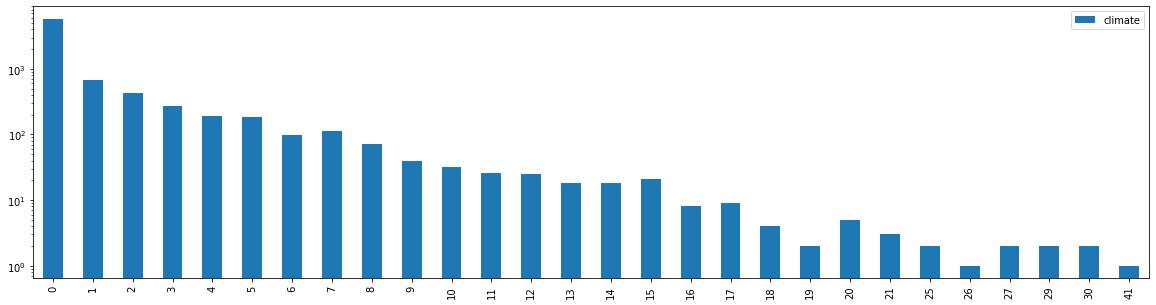

In [7]:
df_histogram_number_of_mentions = pd.DataFrame(data=ck.histogram_number_of_mentions)
df_histogram_number_of_mentions.plot.bar(logy=True, figsize=(20,5))

<b>References per year: total, average,per WHO region</b>

In [8]:
df_per_year = pd.DataFrame(data=ck.per_year)
df_per_year

,climate
1970,0
1971,0
1972,0
1973,1
1974,0
1975,0
1976,0
1977,2
1978,7
1979,2


AxesSubplot(0.125,0.125;0.775x0.755)


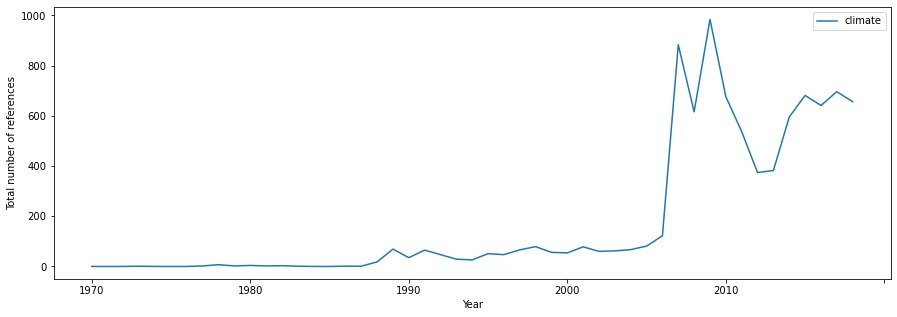

In [9]:
ax = df_per_year.plot.line(figsize=(15,5))
#ax.set_xticklabels(range(1970,2017))
ax.set_xlabel("Year")
ax.set_ylabel("Total number of references")
print(ax)

AxesSubplot(0.125,0.125;0.775x0.755)


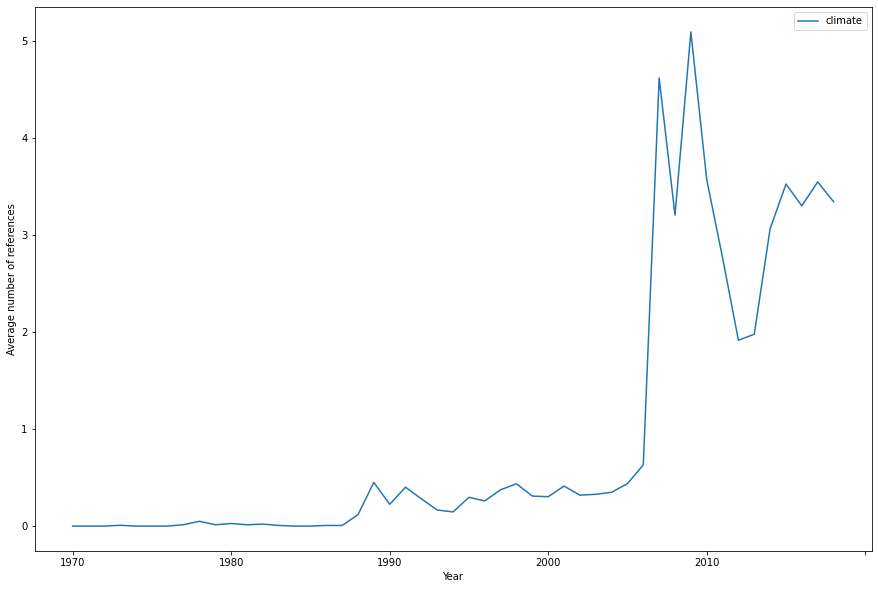

In [10]:
df_average_per_year = pd.DataFrame(data=ck.average_per_year)
ax = df_average_per_year.plot.line(figsize=(15,10))
ax.set_xlabel("Year")
ax.set_ylabel("Average number of references")
print(ax)

<AxesSubplot:xlabel='Year', ylabel='Number of references per region'>

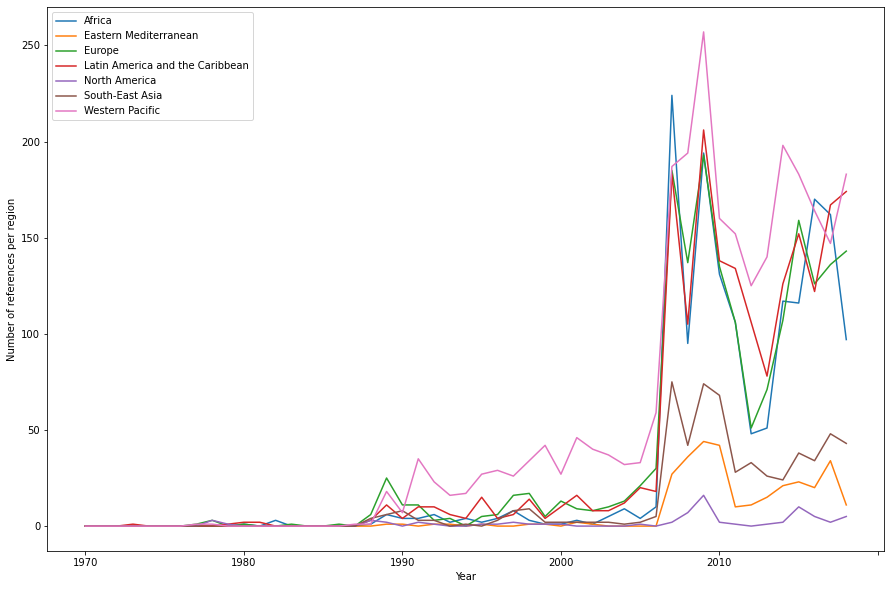

In [11]:
df_per_region_year = pd.DataFrame(data=ck.per_region_year)
ax = df_per_region_year.plot.line(figsize=(15,10))
ax.set_xlabel("Year")
ax.set_ylabel("Number of references per region")
ax

<b>Frequency of keywords:climate</b>

In [11]:
df_climate_keywords = pd.DataFrame(sorted(ck.global_count_climate_keywords.items(), key=lambda k: k[1], reverse=True), columns=["Keyword", "Number of mentions"])
df_climate_keywords

,Keyword,Number of mentions
0,climate_change,6894
1,greenhouse,617
2,global_warming,617
3,renewable_energy,398
4,temperature,151
5,low_carbon,94
6,extreme_weather,70
7,climate_variability,9
8,carbon_emission,7


#  Analysis on other  datasets


## water resource
The value used here is National Rainfall Index(NRI). An indicator, developed by FAO, which represents the quality of the crop growing season. 

In [ ]:
df = pd.read_csv("../data/Rainfall.csv")
df.head()

In [ ]:
df_water_year = df.groupby('Year')['Value'].mean()
ax=df_water_year.plot.line(figsize=(15,5))
ax.set_xlabel("Year")
ax.set_ylabel("Average Rainfall per year")
ax

##   Industry value added to GDP

In [ ]:
df = pd.read_csv("../data/IndustryToGDP.csv")
df.head()

In [ ]:
df_GDP_year = df.groupby('Year')['Value'].mean()
ax=df_GDP_year.plot.line(figsize=(15,5))
ax.set_xlabel("Year")
ax.set_ylabel("Average Industry value contribute to GDP per year")
ax

#  LDA model using Bag of Word

## Tokenize documents and lemmatize
In this part, some pre-processing is done on the corpus to get rid of the words that useful information, such as function words like the, or digits. The corpus is also lemmatized to avoid sparsity.

<b> Preprocess</b>

In [13]:
import myLdaModel
docs = myLdaModel.docs_preprocessor(p.docs)

<b> Build Biagram Models </b>

Build the Topic model
1. Remove rare & common tokens
2. create the corpus and dictionary

In [13]:
docs = myLdaModel.docs_biTrigram(docs)

In [15]:
dictionary, corpus, lda_model = myLdaModel.coreModel(docs = docs, num_topics = 5, chunksize = 800 , passes = 20 , iterations = 400, eval_every = 1 )
# Print the Keyword in the 5 topics
print("Keyword in the 5 topics")
print(lda_model.print_topics())

Number of unique tokens: 12078
Number of documents: 8093
Keyword in the 5 topics
[(0, '0.008*"africa" + 0.008*"south" + 0.006*"developing" + 0.005*"operation" + 0.005*"conference" + 0.005*"nuclear" + 0.005*"relation" + 0.005*"republic" + 0.004*"power" + 0.004*"solution"'), (1, '0.012*"palestinian" + 0.010*"resolution" + 0.010*"israel" + 0.007*"terrorism" + 0.006*"syria" + 0.005*"stability" + 0.005*"israeli" + 0.005*"sudan" + 0.005*"solution" + 0.005*"terrorist"'), (2, '0.005*"america" + 0.004*"power" + 0.004*"every" + 0.004*"cannot" + 0.004*"freedom" + 0.004*"justice" + 0.004*"history" + 0.004*"without" + 0.004*"million" + 0.003*"american"'), (3, '0.010*"global" + 0.008*"sustainable" + 0.007*"climate" + 0.007*"change" + 0.006*"challenge" + 0.005*"developing" + 0.005*"island" + 0.005*"commitment" + 0.005*"africa" + 0.005*"african"'), (4, '0.007*"cooperation" + 0.006*"process" + 0.006*"global" + 0.005*"republic" + 0.004*"reform" + 0.004*"social" + 0.004*"european" + 0.004*"issue" + 0.004

## Plot coherence score and Find optimal number of topics

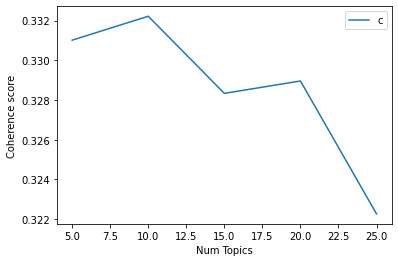

In [17]:
model_list, coherence_values = myLdaModel.compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=5, limit=30, step=5)
# Show graph
import matplotlib.pyplot as plt
limit=30; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [18]:
# Print the coherence scores 
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.331
Num Topics = 10  has Coherence Value of 0.3322
Num Topics = 15  has Coherence Value of 0.3283
Num Topics = 20  has Coherence Value of 0.329
Num Topics = 25  has Coherence Value of 0.3223


In [19]:
from pprint import pprint
# finding the number of topics that gives the highest Coherence Value 
max_cv=max(coherence_values)
# finding the index of the model with this numnber of topics
index_model=coherence_values.index(max_cv)
# print(index_model)
# Select the model and print the topics 
optimal_model = model_list[index_model]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=5))


[(0,
  '0.004*"republic" + 0.004*"developing" + 0.004*"south" + 0.004*"relation" + '
  '0.004*"resolution"'),
 (1,
  '0.007*"sudan" + 0.007*"palestinian" + 0.006*"terrorism" + '
  '0.006*"resolution" + 0.005*"stability"'),
 (2,
  '0.011*"african" + 0.011*"africa" + 0.006*"republic" + 0.004*"south" + '
  '0.003*"election"'),
 (3,
  '0.009*"global" + 0.008*"sustainable" + 0.006*"climate" + 0.006*"challenge" '
  '+ 0.006*"change"'),
 (4,
  '0.005*"cooperation" + 0.004*"republic" + 0.004*"global" + '
  '0.003*"resolution" + 0.003*"issue"'),
 (5,
  '0.005*"terrorist" + 0.004*"israel" + 0.004*"terrorism" + 0.004*"pakistan" + '
  '0.004*"palestinian"'),
 (6,
  '0.005*"africa" + 0.005*"process" + 0.005*"african" + 0.004*"south" + '
  '0.004*"developing"'),
 (7,
  '0.006*"turkey" + 0.005*"republic" + 0.005*"nuclear" + 0.004*"relation" + '
  '0.004*"south"'),
 (8,
  '0.007*"republic" + 0.004*"democratic" + 0.004*"nuclear" + 0.004*"process" + '
  '0.004*"weapon"'),
 (9,
  '0.008*"global" + 0.006*

## Topics along with 10 most frequent words 

In [20]:
import postprocess
outputpath = '../data/Topics_UN.csv'
postprocess.writeTopicWords(outputpath,optimal_model)

<b> Displaying the file</b>

This file is a csv file. Each line of the file contains a topic id along with 10 most common words for the topic.

In [21]:
from IPython.display import display
df = pd.read_csv(outputpath)
display(df)

,topic_id,term0,term1,term2,term3,term4,term5,term6,term7,term8,term9
0,0,republic,developing,south,relation,resolution,process,africa,europe,conference,system
1,1,sudan,palestinian,terrorism,resolution,stability,yemen,solution,syrian,agreement,african
2,2,african,africa,republic,south,election,continent,commitment,solution,sudan,great
3,3,global,sustainable,climate,challenge,change,developing,agenda,commitment,reform,cooperation
4,4,cooperation,republic,global,resolution,issue,conference,force,system,process,determination
5,5,terrorist,israel,terrorism,pakistan,palestinian,syria,global,refugee,resolution,agreement
6,6,africa,process,african,south,developing,republic,issue,resolution,solution,nuclear
7,7,turkey,republic,nuclear,relation,south,resolution,social,korea,democratic,global
8,8,republic,democratic,nuclear,process,weapon,resolution,respect,cooperation,issue,agreement
9,9,global,change,sustainable,climate,challenge,island,system,commitment,responsibility,cooperation


## Dominant topic for each document
In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence.
In this way, you will know which document belongs predominantly to which topic.

In [22]:
df_topic_sents_keywords = postprocess.format_topics_sentences(optimal_model, corpus, docs)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.6849,"republic, developing, south, relation, resolut...","[first, convey, president, congratulation, alb..."
1,1,0.0,0.4314,"republic, developing, south, relation, resolut...","[fortunate, coincidence, precisely, united, na..."
2,2,0.0,0.4841,"republic, developing, south, relation, resolut...","[pleasure, extend, president, warmest, congrat..."
3,3,0.0,0.5645,"republic, developing, south, relation, resolut...","[begin, expressing, ambassador, hambro, behalf..."
4,4,0.0,0.6857,"republic, developing, south, relation, resolut...","[doubt, coming, rostrum, wonder, usefulness, f..."
5,5,0.0,0.5263,"republic, developing, south, relation, resolut...","[today, mourning, untimely, death, president, ..."
6,6,0.0,0.5004,"republic, developing, south, relation, resolut...","[congratulate, president, deserved, election, ..."
7,7,0.0,0.5654,"republic, developing, south, relation, resolut...","[president, first, congratulate, unanimous, el..."
8,8,0.0,0.5461,"republic, developing, south, relation, resolut...","[general, assembly, fortunate, indeed, preside..."
9,9,0.0,0.5834,"republic, developing, south, relation, resolut...","[acting, president, organization, african, uni..."


## Visualization:Intertopic Distance Map &  Word Clouds
Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

In [23]:
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models 
import matplotlib.pyplot as plt
#%matplotlib inline  
vis = pyLDAvis.gensim_models.prepare(topic_model=optimal_model, corpus=corpus, dictionary=dictionary) # visualize the topic
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

<b>Word Clouds of Top 10 Keywords in Each Topic</b>

A word cloud with the size of the words proportional to the weight is a pleasant sight. The coloring of the topics I’ve taken here is followed in the subsequent plots as well.

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


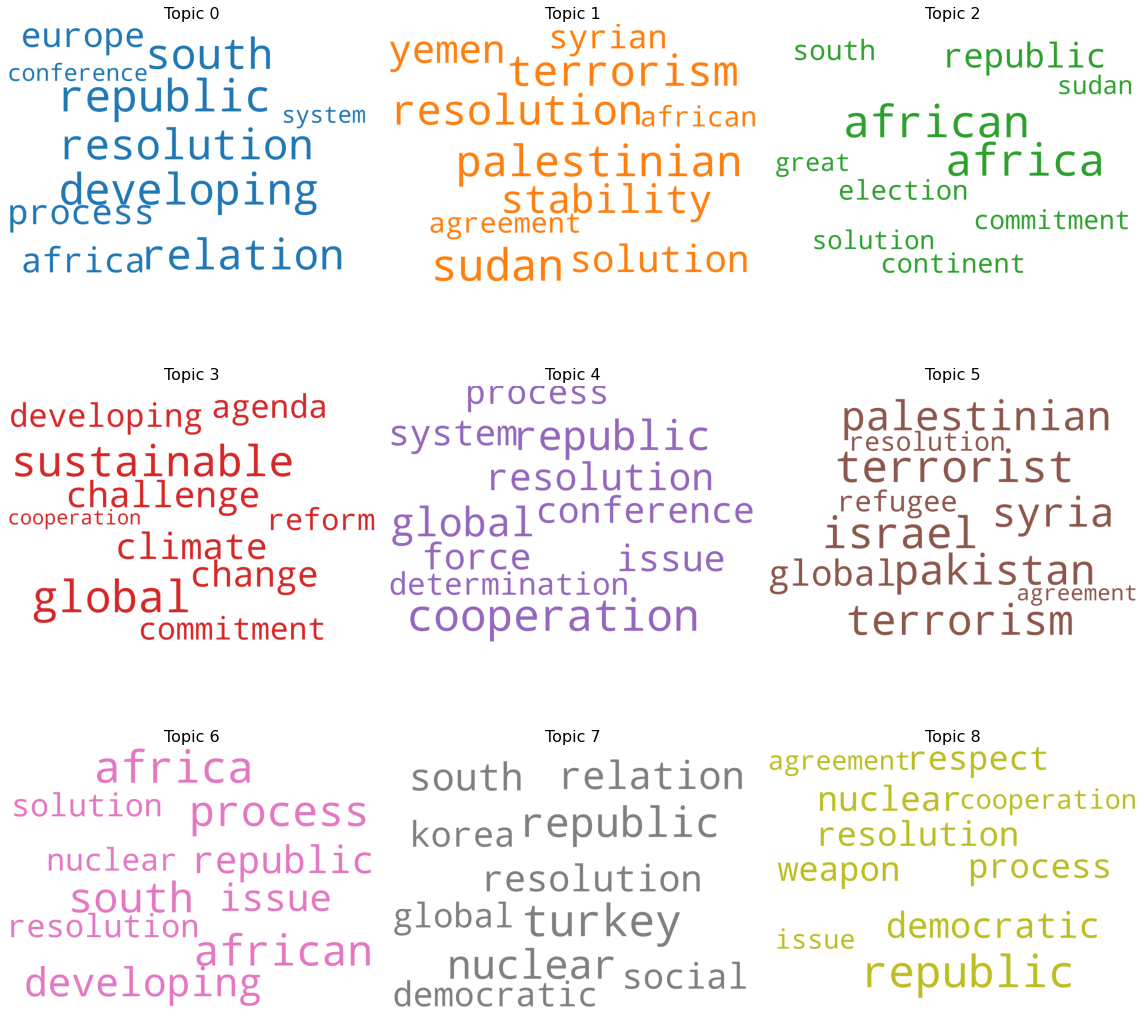

In [24]:
postprocess.wordCloud(optimal_model, corpus, dictionary)

## Conclusion
We started with understanding what topic modeling can do. We built a basic topic model using Gensim’s LDA and visualize the topics using pyLDAvis. What's more, we learned how to find the optimal number of topics using coherence scores and how to choose the optimal model.
Finally, we conducted multiple ways to visualize the outputs of topic models.

# LDA model using TF-IDF

## CountVectorizer

In [26]:
from ldaModelTFIDF import readFileTF
from ldaModelTFIDF import LemmaCountVectorizer
path = "..\\data\\output.csv"
docs_text = readFileTF(path)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
# max_df = 0.8 -> Discard words which appear in 80% of the documents
# min_df = 20 -> Keep words only if they appear in at least 20 documents
vectorizer = LemmaCountVectorizer(max_df=0.8, 
                                  min_df=20,
                                  stop_words='english',
                                  lowercase=True,                   # convert all words to lowercase
                                  token_pattern='[a-zA-Z0-9]{5,}',  # num char>4
                                  ngram_range=(1, 2),     # single word or biagram
                                  decode_error='ignore')

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
m=list(docs_text.Article.values)
ft_vectorizer = vectorizer.fit_transform(m)  # vectorize the doc with TF-IDF

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Build the Topic model

In [29]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components = 10,max_iter=5,     #choose 10 topic                            
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(ft_vectorizer)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)


## Topics along with 10 most frequent words

In [6]:
import pandas as pd
words = {}
for i,topic in enumerate(lda.components_):
    # store the words most relevant to the topic
    words[i]=[vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]]
    
words=pd.DataFrame(words, columns=[0,1,2,3,4,5,6,7,8,9])
words.add_prefix('Topic')


,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9
0,operation,soviet,republic china,territory,latin,field,territory,palestinian,people republic,territory
1,united states,south,interest,developed,developing countries,south,committee,zionist,purpose,disarmament
2,agreement,developing countries,soviet,weapon,israel,developing countries,agreement,egypt,treaty,african
3,struggle,israeli,treaty,south,interest,foreign,foreign,africa,secretary general,agreement
4,south,china,people republic,committee,common,operation,result,occupied,africa,developing countries
5,territory,territory,agreement,result,united states,aggression,united states,palestine,member states,united states
6,african,agreement,africa,africa,treaty,territory,operation,israeli,secretary,operation
7,israel,africa,secretary general,african,agreement,africa,american,aggression,international community,south
8,regime,united states,united states,developing countries,pakistan,agreement,africa,territory,effective,china
9,africa,israel,china,resource,india,israel,china,israel,disarmament,africa


## Dominant topic for each document

In [7]:
topic_results = lda.transform(ft_vectorizer)
topic = topic_results.argmax(axis = 1)


In [8]:
docs_text['Topic'] = topic.tolist()
#docs_text.append(topic)
#topic_doc=list(zip(docs_text,topic))
#topic_doc=pd.DataFrame(docs_text, columns=['Article','Topic'])
docs_text.head(10)

,Article,Topic
0,33: May I first convey to our President the co...,9
1,177.\t : It is a fortunate coincidence that pr...,9
2,100.\t It is a pleasure for me to extend to y...,9
3,155.\t May I begin by expressing to Ambassado...,9
4,"176. No doubt each of us, before coming up to ...",9
5,\n71.\t. We are today mourning the untimely de...,9
6,135.\t I wish to congratulate the President o...,9
7,"1.\tMr. President, I should like, first of all...",9
8,\nThe General Assembly is fortunate indeed to ...,9
9,: A year ago I came here as the Acting Preside...,9


## Visualization the topic keywords

In [9]:
import pyLDAvis
import pyLDAvis.sklearn
%matplotlib inline

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, ft_vectorizer, vectorizer, mds='tsne')#visualize it

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
9      32.420952   8.115230       1        1  95.044960
7       0.648955  71.707100       2        1   4.876334
4      71.019684   9.971006       3        1   0.009839
5       3.785981  33.185135       4        1   0.009838
1     -42.666500  -9.222070       5        1   0.009838
3      -3.621689 -43.526516       6        1   0.009838
2      -3.632402  -4.171708       7        1   0.009838
6     -36.584400  35.804413       8        1   0.009838
0      44.391380  50.615383       9        1   0.009838
8      40.235809 -31.591665      10        1   0.009838, topic_info=                      Term         Freq        Total Category  logprob  \
67                  africa  1137.000000  1137.000000  Default  30.0000   
309                  china   990.000000   990.000000  Default  29.0000   
1937                 south   958.000000   958.000000  Default  28.0000   
1395             operation   717.000000   717.000000  Default  27.0000   
576   developing countries   653.000000   653.000000  Default  26.0000   
...                    ...          ...          ...      ...      ...   
1395             operation     0.017511   717.836356  Topic10  -6.9671   
1787              resource     0.016115   438.114722  Topic10  -7.0502   
309                  china     0.017345   990.317448  Topic10  -6.9766   
289                certain     0.015517   380.592625  Topic10  -7.0880   
82               agreement     0.015880   662.965150  Topic10  -7.0649   

      loglift  
67    30.0000  
309   29.0000  
1937  28.0000  
1395  27.0000  
576   26.0000  
...       ...  
1395  -1.3945  
1787  -0.9838  
309   -1.7258  
289   -0.8809  
82    -1.4128  

[790 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
0         1  0.944068          abandon
0         2  0.062938          abandon
10        1  0.900374      accompanied
10        2  0.122778      accompanied
11        1  0.903380     accomplished
...     ...       ...              ...
2264      2  0.044069  years existence
2266      1  0.955349        yesterday
2266      2  0.061635        yesterday
2272      1  0.706523          zionist
2272      2  0.295754          zionist

[748 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 8, 5, 6, 2, 4, 3, 7, 1, 9])

# LDA model for climate using Bag of Words

In [30]:
texts_climate = myLdaModel.climateDocsProcess(docs_text)
# Includes biagram models
texts_climate=myLdaModel.docs_biTrigram(texts_climate)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Create Dictionary and corpus

In [31]:
dictionaryClimate1, corpusClimate1, modelClimate1 = myLdaModel.coreModel(docs = texts_climate, no_below=20, no_above=0.95, num_topics = 6, chunksize = 2000, passes = 20, iterations = 400, eval_every = None)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of unique tokens: 10220
Number of documents: 3674


## Visualization the topic key words

In [33]:
import pyLDAvis.gensim_models  as gensimvis
vis_data = gensimvis.prepare(modelClimate1, corpusClimate1, dictionaryClimate1)
%matplotlib inline
# warnings.filterwarnings("ignore")
pyLDAvis.display(vis_data) # the result has a little overlap 

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# LDA model for climate using TF-IDF

## Select documents and CountVectorizer

In [34]:
text_climate = docs_text[docs_text['Article'].str.contains("climate")] # the doc contain "climate"
textclimate = list(text_climate.Article.values)

# Calling our overwritten Count vectorizer(TF-IDF)
tf_vectorizer = LemmaCountVectorizer(max_df=0.95, 
                                  min_df=20,
                                  stop_words='english',
                                  lowercase=True,                   # convert all words to lowercase
                                  token_pattern='[a-zA-Z0-9]{5,}',  # num char>4
                                  ngram_range=(1, 2), 
                                  decode_error='ignore')
tf = tf_vectorizer.fit_transform(textclimate)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Build the Topic model

In [35]:
lda = LatentDirichletAllocation(n_components=6, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)
lda_climate=lda.fit(tf)

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualization the topic keywords

In [36]:
import pyLDAvis
import pyLDAvis.sklearn

%matplotlib inline
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_climate, tf, tf_vectorizer, mds='tsne')

D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2       1.465019 -47.625065       1        1  44.627947
4      54.854797 -36.476795       2        1  39.083996
1      32.212929 -61.444572       3        1  11.101441
5       5.111096 -14.110332       4        1   5.068984
0      26.350170 -33.374702       5        1   0.093733
3      38.109818  -7.222781       6        1   0.023898, topic_info=                   Term          Freq         Total Category  logprob  loglift
21798          republic  11421.000000  11421.000000  Default  30.0000  30.0000
11322        government  20529.000000  20529.000000  Default  29.0000  29.0000
16852           nuclear  10914.000000  10914.000000  Default  28.0000  28.0000
10333             force   9520.000000   9520.000000  Default  27.0000  27.0000
26665     united states   5999.000000   5999.000000  Default  26.0000  26.0000
...                 ...           ...           ...      ...      ...      ...
10931  general assembly      0.250330  12375.736393   Topic6  -8.4843  -2.4694
20037          progress      0.243742   8800.362302   Topic6  -8.5110  -2.1551
23975             south      0.247752  12242.385230   Topic6  -8.4947  -2.4689
10333             force      0.240781   9520.562055   Topic6  -8.5232  -2.2460
12218             human      0.236889  17879.496915   Topic6  -8.5395  -2.8925

[488 rows x 6 columns], token_table=       Topic      Freq                 Term
term                                       
210        1  0.002210       accountability
210        2  0.996870       accountability
210        3  0.002210       accountability
268        2  0.994882  achieve sustainable
352        1  0.409954               action
...      ...       ...                  ...
27941      3  0.162606                 year
27941      4  0.046237                 year
27941      5  0.000091                 year
28033      1  0.995257                zaire
28033      2  0.003813                zaire

[1248 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 5, 2, 6, 1, 4])

# Sentiment Analysis

- we make use of package afinn to compute the index of sentiment polarity: positve, negative or neutral
- The package can compute the indexs for each sentence based on corups it stores.
- we split each document to sentences and simply average the indexs of all sentences
- then we summarize 3 indexs among all documents for every year to see the total attitude showed in the speechs that year.

In [ ]:
import sentimentAnal
sa = sentimentAnal.sentimentAnal(p.years,p.files,p.docs)
pos_index,neg_index,neutral_index = sa.getIndexs()

In [ ]:
sa.vis(pos_index,neg_index,neutral_index)

# DTM

In [ ]:
import dtm

In [ ]:
data = pd.read_csv('../output/output.csv')

In [ ]:
data = dtm.preprocess(data)

In [ ]:
import dtm.SentenceTokenizer
import dtm.ParagraphTokenizer
# sort the data and splitting data into paragraphs

debates = data.sort_values(['Year', 'Country Name']).reset_index(drop=True)

paragraph_tokenizer = ParagraphTokenizer()

paragraphs = pd.Series(
    debates.Content
    .apply(lambda x: [x[start:end] for start, end
                        in paragraph_tokenizer.span_tokenize(x)]) 
    .apply(lambda x: pd.Series(x))
    .stack()
    .reset_index(level=1, drop=True), name='text')

debates_paragraphs = (debates
                        .drop('Content', axis=1)
                        .join(paragraphs)
                        .reset_index())
    # Must retain this new index to preserve ordering of paragraphs within
    # each speech.
debates_paragraphs.index.name = 'paragraph_index'
debates_paragraphs['text_clean'] = debates_paragraphs['text'].str.lower()


In [ ]:
import dtm.clean
# clean text
debates_paragraphs['text_clean'] = debates_paragraphs.text_clean.apply(lambda x: clean(x))

# tockenize text
debates_paragraphs['token'] = debates_paragraphs['text_clean'].apply(word_tokenize)

stop_words = set(stopwords.words('english'))
# I noticed that "'s" is not included in stopwords, while I think it doesn't bring much meaning in a text, so I'll add it to the set to remove from the cleaned tokens.
stop_words.add("'s")
stop_words.add("'")
stop_words.add("-")
stop_words.add("'")
debates_paragraphs['clean'] = debates_paragraphs['token'].apply(lambda x: [w for w in x if not w in stop_words and not w in punctuation])


In [ ]:
debates_paragraphs.head()

In [ ]:
texts = debates_paragraphs['clean']

In [ ]:
# Remove numbers, but not words that contain numbers.
texts = [[token for token in text if not token.isnumeric()] for text in texts]

# Remove words that are only one character.
texts = [[token for token in text if len(token) > 1] for text in texts]

In [ ]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(texts)

# Filter out words that occur less than 100 documents.
dictionary.filter_extremes(no_below=100)

In [ ]:
# Vectorize data.

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in texts]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

In [ ]:
# define time-slice
print(len(debates_paragraphs[debates_paragraphs['Year'].between(1970,1979)]))
print(len(debates_paragraphs[debates_paragraphs['Year'].between(1980,1989)]))
print(len(debates_paragraphs[debates_paragraphs['Year'].between(1990,1999)]))
print(len(debates_paragraphs[debates_paragraphs['Year'].between(2000,2009)]))
print(len(debates_paragraphs[debates_paragraphs['Year'].between(2010,2018)]))

In [ ]:
time_slice = [56668, 66057, 71396, 56183,46118]

In [ ]:
# train the model
ldaseq = ldaseqmodel.LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slice, num_topics=5)

In [ ]:
#input parameter is a time-slice option, individual list in result contains a tuple of the most probable words in the topic. i.e (word, word_probability)
ldaseq.print_topics(time=0)

In [ ]:
# evolution for 1st topic
ldaseq.print_topic_times(topic=0)

In [ ]:
freqs_df = dtm.getFreq(debates_paragraphs)
freqs_df.head()

In [ ]:
# topic 1 - Economic development
freqs_df[freqs_df['word'].isin(['development','economic','trade','poverty','challenges'])].iloc[:, 1:50].transpose().iloc[1:].plot(title="Economic development")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()

In [ ]:
# Topic 2 - Work of United Nations
freqs_df[freqs_df['word'].isin(['assembly','secretary','session','election','organization'])].iloc[:, 1:50].transpose().iloc[1:].plot(title="Work of United Nations")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()

In [ ]:
# Topic 3 - Peace, regional conflicts and nuclear disarmament
freqs_df[freqs_df['word'].isin(['peace','nuclear','weapons','israel','arab','disarmament'])].iloc[:, 1:50].transpose().iloc[1:].plot(title="Peace, regional conflicts and nuclear disarmament")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()

In [ ]:
# Topic 5 - Decolonization campaign and human rights
freqs_df[freqs_df['word'].isin(['africa','rights','south','struggle','independence','freedom'])].iloc[:, 1:50].transpose().iloc[1:].plot(title="Decolonization campaign and human rights")
axes = plt.gca()
axes.set_facecolor('#F4EEDA')
plt.show()